# 2. Words as features

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import json
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# 2.1 Processing the dataset and display number of tokens

In [6]:
with open("goemotions.json", "r") as data:
    file = pd.read_json(data)
    
emotion = file[1].value_counts().to_dict()
sentiment = file[2].value_counts().to_dict()

posts = file[0].tolist()
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(posts)

print(f"The size of the vocabulary is {len(X.toarray()[0])}")


The size of the vocabulary is 30449


## 2.2 Split the dataset

In [7]:
#get the location
emo = preprocessing.LabelEncoder()
senti = preprocessing.LabelEncoder()

#vectorizing emotions
emo = emo.fit_transform(file[1]) 
#vectorizing sentiments
senti = senti.fit_transform(file[2]) 

#now splitting the data 
X_train, X_test, Yemo_train, Yemo_test, Ysenti_train, Ysenti_test = train_test_split(X, emo, senti, test_size = 0.2, train_size=0.8)

## 2.3 & 2.4 Classifiers and metrics

### 2.3.1 Base-MNB: Multinomial naive bayes classifier

The performance of Multinomial naive bayes classifier with default parameters for emotions.

              precision    recall  f1-score   support

           0       0.49      0.44      0.46      2102
           1       0.51      0.26      0.35      1228
           2       0.37      0.12      0.18      1048
           3       0.20      0.07      0.10      1650
           4       0.26      0.09      0.13      2280
           5       0.31      0.07      0.11       680
           6       0.28      0.05      0.09       974
           7       0.38      0.10      0.16      1166
           8       0.32      0.03      0.05       430
           9       0.24      0.04      0.07       941
          10       0.24      0.08      0.12      1489
          11       0.39      0.06      0.11       598
          12       0.50      0.01      0.03       306
          13       0.32      0.04      0.08       585
          14       0.41      0.03      0.06       386
          15       0.74      0.69      0.7

/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

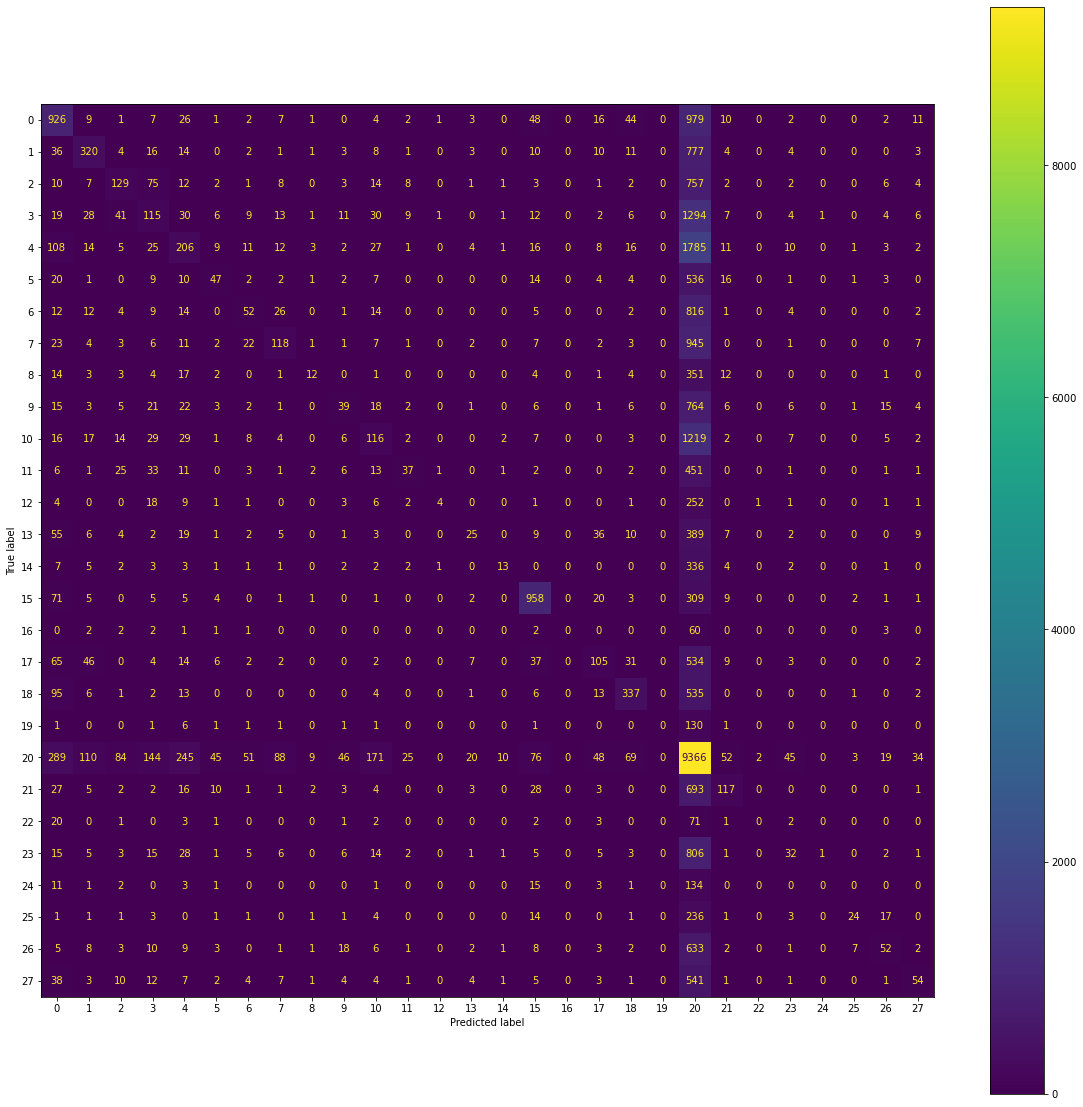

In [8]:
MNB = MultinomialNB()

#for emotions classification
MNBmodel = MNB.fit(X_train, Yemo_train)
pred = MNB.predict(X_test)

print("The performance of Multinomial naive bayes classifier with default parameters for emotions.\n")
print(classification_report(Yemo_test, pred))
cm = confusion_matrix(Yemo_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
disp.plot(ax = ax) 


The performance of naive bayes classifier with default parameters for sentiments.

              precision    recall  f1-score   support

           0       0.42      0.24      0.31      3803
           1       0.54      0.52      0.53      7725
           2       0.49      0.50      0.49     11051
           3       0.62      0.70      0.66     11785

    accuracy                           0.55     34364
   macro avg       0.52      0.49      0.50     34364
weighted avg       0.54      0.55      0.54     34364



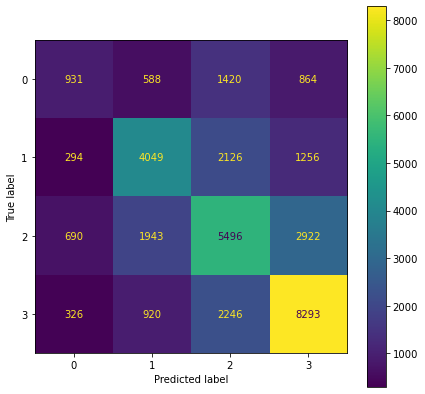

In [9]:
#for sentiments classification
MNBmodel = MNB.fit(X_train, Ysenti_train)
pred = MNB.predict(X_test)

print("The performance of naive bayes classifier with default parameters for sentiments.\n")
print(classification_report(Ysenti_test, pred))
cm = confusion_matrix(Ysenti_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) #suggested from stack-overflow
disp.plot(ax = ax)

### 2.3.4 Top-MNB

/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


The performance of naive bayes classifier with best hyper-parameters for emotions.

The best hyper-parameter value is : {'alpha': 0.5}

              precision    recall  f1-score   support

           0       0.47      0.50      0.49      2102
           1       0.51      0.42      0.46      1228
           2       0.34      0.21      0.26      1048
           3       0.19      0.11      0.14      1650
           4       0.25      0.13      0.17      2280
           5       0.24      0.15      0.18       680
           6       0.27      0.12      0.16       974
           7       0.36      0.19      0.25      1166
           8       0.30      0.08      0.12       430
           9       0.21      0.09      0.12       941
          10       0.23      0.14      0.17      1489
          11       0.36      0.14      0.20       598
          12       0.53      0.05      0.10       306
          13       0.29      0.09      0.13       585
          14       0.39      0.12      0.18       386

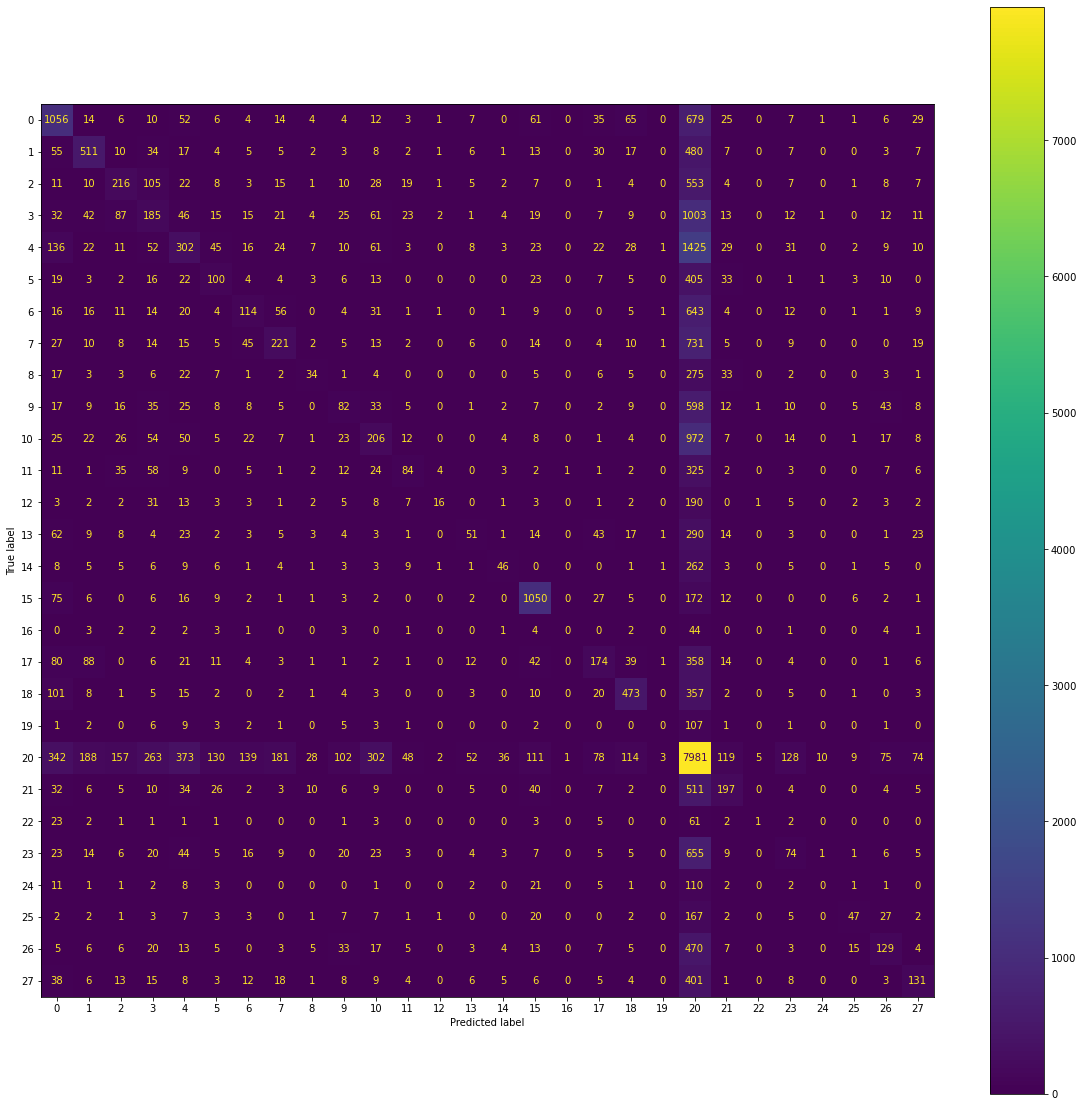

In [26]:
MNB = MultinomialNB()

parameters = {"alpha":(2, 1, 0.5, 0)}
gs = GridSearchCV(estimator = MNB, param_grid = parameters, n_jobs = -1, refit = True)
gs.fit(X_train, Yemo_train)
pred = gs.best_estimator_.predict(X_test)

print("The performance of naive bayes classifier with best hyper-parameters for emotions.\n")
print(f"The best hyper-parameter value is : {gs.best_params_}\n")
print(classification_report(Yemo_test, pred))
cm = confusion_matrix(Yemo_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(20, 20)) #suggested from stack-overflow
disp.plot(ax = ax)


/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(
/Users/nirmalghinaiya/opt/anaconda3/lib/python3.9/site-packages/sklearn/naive_bayes.py:555: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  warnings.warn(


The performance of naive bayes classifier with best hyper-parameters for sentiments.

The best hyper-parameter value is : {'alpha': 1}

              precision    recall  f1-score   support

           0       0.42      0.24      0.31      3803
           1       0.54      0.52      0.53      7725
           2       0.49      0.50      0.49     11051
           3       0.62      0.70      0.66     11785

    accuracy                           0.55     34364
   macro avg       0.52      0.49      0.50     34364
weighted avg       0.54      0.55      0.54     34364



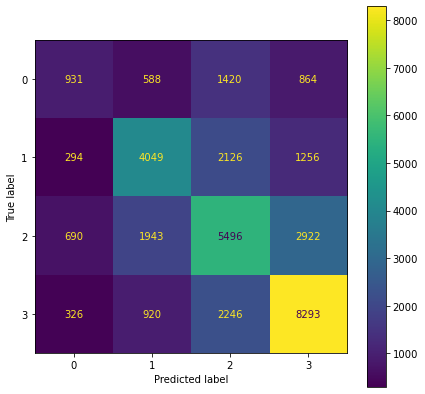

In [28]:
MNB = MultinomialNB()

parameters = {"alpha":(2, 1, 0.5, 0)}
gs = GridSearchCV(estimator = MNB, param_grid = parameters, n_jobs = -1, refit = True)
gs.fit(X_train, Ysenti_train)
pred = gs.best_estimator_.predict(X_test)

print("The performance of naive bayes classifier with best hyper-parameters for sentiments.\n")
print(f"The best hyper-parameter value is : {gs.best_params_}\n")
print(classification_report(Ysenti_test, pred))
cm = confusion_matrix(Ysenti_test, pred)
disp = ConfusionMatrixDisplay(cm)
fig, ax = plt.subplots(figsize=(7, 7)) #suggested from stack-overflow
disp.plot(ax = ax)